In [ ]:
# various imports you'll need later on
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import random
import pandas as pd
import math

## Introduction to Probability - Day 2 - Part 2

Welcome 😀 This is the practical session for the second part of the probability course, September 12th, 2024. The first part of the exercise teaches you how to sample from a normal distribution using the Central Limit Theorem and the second part takes you to the Newcomb’s speed of light story.


---


Prepared by:\
Javier Gamazo Tejero\
Lukas Zbinden\
Michel Hayoz

---


## Newcomb's speed of light data

Simon Newcomb set up an experiment in 1882 to measure the speed of light. Newcomb measured the amount of time required for light to travel a distance of 7442 meters. He took 66 measurements, which are stored in $D$. These measurements are recorded as deviations from 24,800 nanoseconds.



In [ ]:
D = [28, 26, 33, 24, 34, -44, 27, 16, 40, -2, 29, 22, 24, 21, 25, 30, 23, 29,
     31, 19, 24, 20, 36, 32, 36, 28, 25, 21, 28, 29, 37, 25, 28, 26, 30, 32,
     36, 26, 30, 22, 36, 23, 27, 27, 28, 27, 31, 27, 26, 33, 26, 32, 32, 24, 39,
     28, 24, 25, 32, 25, 29, 27, 28, 29, 16, 23]

n = len(D)

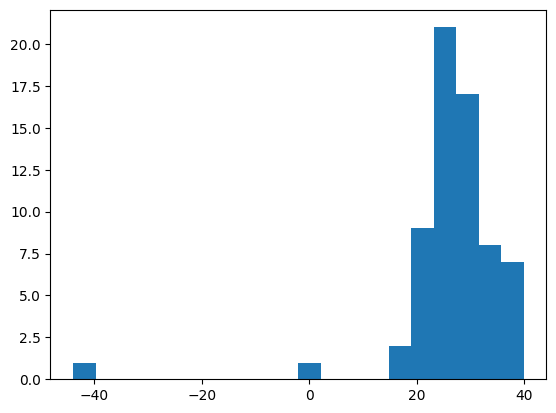

In [ ]:
_ = plt.hist(D, bins=20)

There are two unusually low measurements and then a cluster of measurements that are approximately symmetrically distributed. Even if the two measurements in the left tail could be regarded as outliers, let's fit a Gaussian model to $D$.

**Exercise 1:**  Obtain the mean and the variance of a normal distribution on $D$

In [ ]:
def mean(data): # TODO
    """Calculates the sample mean"""
    return 0

def var(data): # TODO
    """Calculates the sample variance, use the unbiased estimate of the variance"""
    return 0

In [ ]:
xbar = mean(D)
s2 = var(D)

print(f'Mean: {xbar:.2f}. Var: {s2:.2f}')

In [ ]:
plt.hist(D, bins=20)
plt.axvline(x=xbar, color='r')

### Testing our fit

From the previous plot it seems that our fit is good enough. However, we are aware that there are two outliers. A way to test our assumption (that the data follows a normal distribution) is sampling from the posterior distribution:

\begin{align}
x \sim p(x,D) = t_{n-1}\left(x|\mu_n,\sigma_n^2\right)
\end{align}

The posterior distribution of a sample $x$ follows a $t$ distribution with mean $\mu_n$, scale $\sigma_n$, and $n-1$ degrees of freedom.

Since our sample size is $n=66$ is relatively large, we can identify the t distribution with a normal, therefore:

\begin{equation}
x \sim p(x,D) = N\left(x|\mu_n,\sigma_n^2\right)
\end{equation}

**Exercise 2:** Generate posterior samples given the equations above. You are allowed to use `numpy` for that purpose



In [ ]:
def generate_samples(num_samples_generate, n, mu, s2):
    """
    Generate samples according to the normal distribution.
    num_samples_generate (int): how many samples will be generated each time
    n (int): number of samples in the original distribution (len(D))
    mu (float): mean
    s2 (float): variance
    Return:
        - numpy array of random float according to N(mu, (1+1/n)*s2)
    """
    return 0

In [ ]:
def generate_samples_t(num_samples_generate, n, mu, s2):
    """
    Generate samples according to the t_n-1 distribution.
    num_samples_generate (int): how many samples will be generated each time
    n (int): number of samples in the original distribution (len(D))
    mu (float): mean
    s2 (float): variance
    Return:
        - numpy array of random float according to t_(n-1)(mu, (1+1/n)*s2)
    """
    return 0

In [ ]:
samples_n = generate_samples(1000, n, xbar, s2)
samples_t = generate_samples_t(1000, n, xbar, s2)

In [ ]:
plt.hist(samples_n, bins=20, density=True)
_ = plt.hist(samples_t, bins=20, alpha=0.5, density=True)

Now we generate this distribution 20 times:

In [ ]:
ncols = 5
nrows = 4
f, axs = plt.subplots(nrows, ncols, sharey=True, tight_layout=True)
for i in range(nrows):
    for j in range(ncols):
        samples = generate_samples(n, n, xbar, s2)
        axs[i, j].hist(samples, bins=20)

It is clear that with this distribution we cannot generate the large negative samples that we find in the data.

### Credible interval for μ


We can calculate the credible interval for μ. From a Bayesian point of view, this means that μ falls into an interval within a particular probability $1-\alpha$. For the sake of simplicity, we first assume known population variance $\sigma^2$. Further, we assume the uninformative prior distribution $p(\mu)\propto 1$. The posterior is given by

\begin{align}
p(\mu|D) & \propto p(D|\mu) p(\mu) \\
& = N(\mu_n, \sigma^2_0)
\end{align}

where $\mu_n, \sigma_0$ are the sample mean and standard error of the mean ($\sigma_0 = \sigma/\sqrt(n)$), respectively. The $1-\alpha$ central posterior interval for µ is obtained from the posterior CDF $F$ as $CI=[F(\frac{\alpha}{2}), F(\frac{1-\alpha}{2})]$.

Note, for unknown population variance, the posterior follows a Student's t distribution $p(\mu|D) \sim t_{n-1}(\mu_n, \frac{\sigma^2_n}{n})$, which leads to a larger interval for small $n$, accounting for the uncertainty in the sample variance.

**Exercise 3:** Obtain the credible interval for μ with 95% probability. You can either assume known or unknown population variance.

*Hint: use [`scipy.stats.t.ppf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t) for this.*

In [ ]:
def credible_interval(p, dof, mu, s2):
    """
    Return the credible interval with probability p
    p (float): interval probability. Keep in mind that we want it two tailed
    dof (int): degrees of freedom (n)
    mu (float): mean of the distribution
    s2 (float): variance of the distribution
    Return:
        low (float): lower bound of the credible interval
        high (float): higher bound of the credible interval
    """
    return 0

In [ ]:
low, high = credible_interval(0.95, n, xbar, s2)

Let's plot the interval along with the distribution and the mean:

In [ ]:
samples = generate_samples(1000, n, xbar, s2)
plt.hist(samples, bins=20)
plt.axvline(x=xbar, color='r')
plt.axvline(x=low, color='r', linestyle='--')
plt.axvline(x=high, color='r', linestyle='--')

### Posterior predictive checks



The formal way of testing the fit of our data is to define a test statistic. Since we want to test if our distribution can generate the small (outlier) values observed in the measurement data, we can define the following test:

\begin{equation}
T(D) = \min\{x : x \in D\}
\end{equation}

Practically, this implies generating samples from the posterior distribution and comparing it to our data.

**Exercise 4:** Perform the test on generated data. To do this, generate 1000 different datasets with $n$ samples each and append the minimum value to a list.

In [ ]:
def test_min(n_datasets, samples_per_dataset, n, mu, s2):
    """
    Perform the min test on a number of datasets with samples_per_dataset
    n_datasets (int): times that we generate a new dataset
    samples_per_dataset (int): number of samples in a dataset.
    n, mu, s2: properties of the data, same as for generate_samples() function
    Return:
        - list of n_datasets values after the test.
    """
    return 0

In [ ]:
v = test_min(1000, n, n, xbar, s2)

In [ ]:
_ = plt.hist(v)
plt.axvline(min(D), color='r')

According to our model, the minimum value that we see in our data ($T(D)=-44$) is very unlikely even after sampling 1000 times.

### References and Further Reading:

\
[1] https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.120.2779&rep=rep1&type=pdf

[2] [Python Programming And Numerical Methods: A Guide For Engineers And Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html)